# Entorno de Investigación y Desarrollo (R&D)

Este notebook está configurado para permitirte prototipar algoritmos utilizando la infraestructura de **Prism**.

### Pasos del Flujo de Trabajo:
1. **Explorar**: Usa este notebook para descargar datos, analizarlos y probar hipótesis.
2. **Validar**: Implementa tu lógica de trading aquí y visualiza los resultados.
3. **Desplegar**: Una vez satisfecho, mueve la lógica a un archivo `.py` en `prism/strategies/`.

In [3]:
# ⚠️ EJECUTAR ESTA CELDA UNA VEZ SI FALTAN LIBRERÍAS
# Esto asegura que se instalen en el KERNEL que está usando el notebook
import sys
!{sys.executable} -m pip install python-binance pandas matplotlib requests

  Using cached python_binance-1.0.34-py2.py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.2-py3-none-any.whl.metadata (29 kB)
  Using cached aiohttp-3.13.2-cp314-cp314-win_amd64.whl.metadata (8.4 kB)
  Using cached websockets-15.0.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached pycryptodome-3.23.0-cp37-abi3-win_amd64.whl.metadata (3.5 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached frozenlist-1.8.0-cp314-cp314-win_amd64.whl.metadata (21 kB)
  Using cached multidict-6.7.0-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached propcache-0.4.1-cp314-cp314-win_amd64.whl.metadata (14 kB)
  Using cached yarl-1.22.0-cp314-cp314-win_amd64.whl.metadata (77 kB)
  Using cached regex-2025.11.3-cp314-cp314-win_amd64.whl.metadata (41 kB)
  Using cached tzlocal-5.3.1-py3-none-any.whl.metadata (7.6 kB)
Using c

In [4]:
# 1. Configuración del Path para importar módulos de Prism
import sys
import os

# Agregamos el directorio raíz 'Spectrum' al path para poder importar 'prism'
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project Root set to: {project_root}")

Project Root set to: c:\Users\ivang\Dev\Spectrum


In [5]:
# 2. Importar módulos de Prism (Ingestors, etc)
from prism.ingestion.binance_ingestor import BinanceProcessor
from binance.client import Client
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# 3. Obtener Datos (Usando tu infraestructura)
try:
    processor = BinanceProcessor()
    print("Conectado a Binance")
except Exception as e:
    print(f"Error conectando: {e}")
    
# Descargar datos históricos para análisis
symbol = "BTCUSDT"
interval = Client.KLINE_INTERVAL_1DAY
start_date = "1 Jan, 2024"

raw_data = processor.get_historical_data(symbol, interval, start_date)

if raw_data:
    df = pd.DataFrame(raw_data)
    # Preprocessing básico
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    print(f"Datos cargados: {df.shape[0]} filas")
else:
    print("No se obtuvieron datos")

[2025-12-26 16:46:18.995557] BinanceProcessor Initialized.
Conectado a Binance
[2025-12-26 16:46:18.996007] Fetching historical data for BTCUSDT from 1 Jan, 2024...
[2025-12-26 16:46:19.582519] Retrieved 726 historical records.
Datos cargados: 726 filas


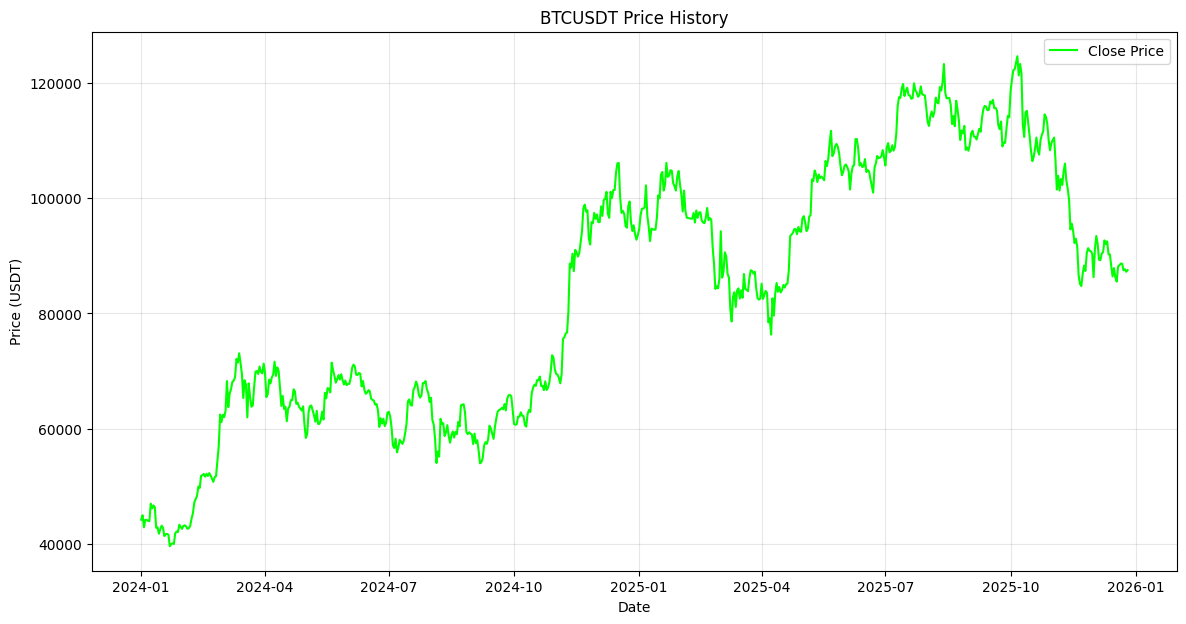

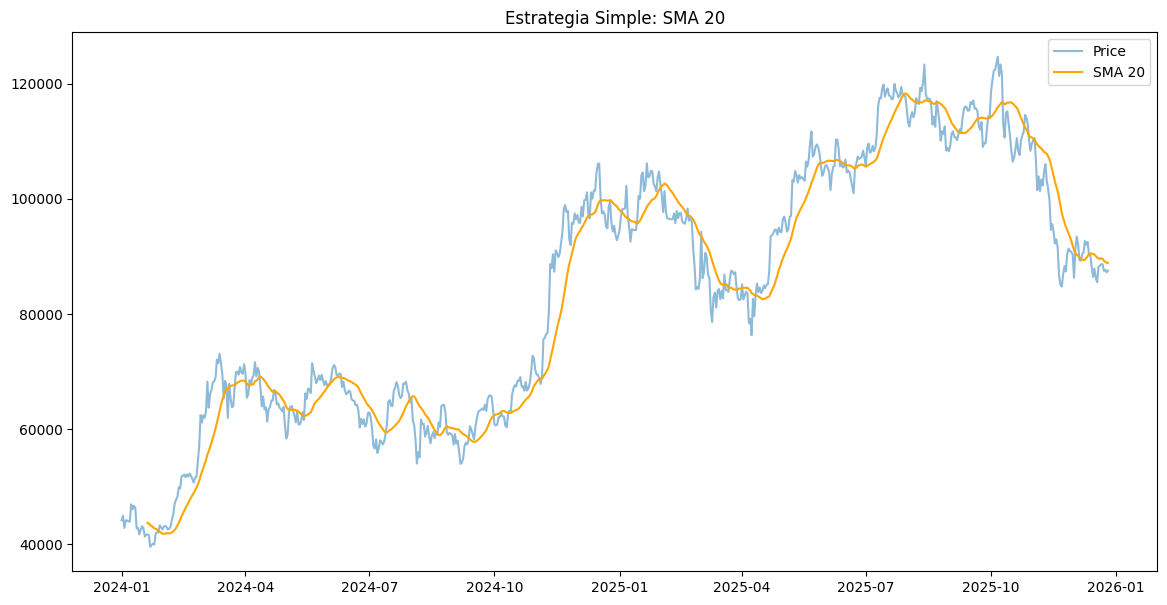

In [7]:
# 4. Visualización y Análisis (Tu zona de juegos)
if 'df' in locals() and not df.empty:
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['close'], label='Close Price', color='#00ff00')
    plt.title(f'{symbol} Price History')
    plt.xlabel('Date')
    plt.ylabel('Price (USDT)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
    
    # Ejemplo: Calcular una media móvil simple aquí mismo
    df['SMA_20'] = df['close'].rolling(window=20).mean()
    
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df['close'], label='Price', alpha=0.5)
    plt.plot(df.index, df['SMA_20'], label='SMA 20', color='orange')
    plt.title('Estrategia Simple: SMA 20')
    plt.legend()
    plt.show()